### 결측값(missing value) 처리

In [8]:
#데이터 형태 확인
head(airquality)
str(airquality)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [15]:
#is.na() : 결측값이 T or F
table(is.na(airquality)) #총 결측값과 결측값이 아닌 갯수 확인
table(is.na(airquality$Ozone)) #Ozone 결측치 확인
table(is.na(airquality$Solar.R)) #Solar.R 결측치 확인

colSums(is.na(airquality)) #참고 : 열별로 결측값 보기


FALSE  TRUE 
  874    44 


FALSE  TRUE 
  116    37 


FALSE  TRUE 
  146     7 

Ozone Solar.R    Wind    Temp   Month     Day 
     37       7       0       0       0       0

In [17]:
#Temp 속성을 이용해서 평균 온도 산출
mean(airquality$Temp) 
mean(airquality$Ozone) #결측값이 있어서 출력 X

[1] 77.88235

[1] NA

In [38]:
#Ozone 속성에 결측값이 아닌 데이터만 추출

air_narm = airquality[!is.na(airquality$Ozone),] #결측값 제거
mean(air_narm$Ozone) #제거 후 평균


[1] 42.12931

[1] 4887

In [39]:
#na.omit() 함수를 이용해서 결축값 처리 : 그 행을 삭제
air_narm2 = na.omit(airquality)
mean(air_narm2$Ozone) #값이 다른 이유 : 오존과 솔라의 결측값이 존재하는 행을 다 삭제되어서


[1] 42.0991

[1] 4673

In [37]:
#함수의에 내장 된 옵션을 이용하는 방법
mean(airquality$Ozone, na.rm= T) #옵션을 사용해서 결측값을 빼고 평균 구하기

[1] 42.12931

In [43]:
#Ozone과 Solar에 있는 결측값을 제외한 데이터셋을 산출하는 작업
air_narm3 = airquality[!is.na(airquality$Ozone) & !is.na(airquality$Solar.R), ]
mean(air_narm3$Ozone)

[1] 42.0991

### 이상값 처리(Outlier)

In [44]:
patients = data.frame(name = c('환자1', '환자2', '환자3', '환자4', '환자5'),
                     age = c(22, 20, 25, 30, 27),
                     gender = factor(c('M', 'F', 'M', 'K', 'F')),
                     blood.type = factor(c('A', 'O', 'B', 'AB', 'C')))
patients

name,age,gender,blood.type
환자1,22,M,A
환자2,20,F,O
환자3,25,M,B
환자4,30,K,AB
환자5,27,F,C


In [45]:
str(patients)

'data.frame':	5 obs. of  4 variables:
 $ name      : Factor w/ 5 levels "환자1","환자2",..: 1 2 3 4 5
 $ age       : num  22 20 25 30 27
 $ gender    : Factor w/ 3 levels "F","K","M": 3 1 3 2 1
 $ blood.type: Factor w/ 5 levels "A","AB","B","C",..: 1 5 3 2 4


In [54]:
#성별에서 이상치값을 제거하는 작업
p1 = patients[patients$gender=='M' | patients$gender == 'F',]
p1

#성별과 혈액형에 이상값을 제가한 데이터셋 p2
p2 = patients[(patients$gender=='M' | patients$gender == 'F')&
              (patients$blood.type=='A' | patients$blood.type == 'B'|
              patients$blood.type=='O' | patients$blood.type == 'AB'),]
p2

,name,age,gender,blood.type
1,환자1,22,M,A
2,환자2,20,F,O
3,환자3,25,M,B
5,환자5,27,F,C


name,age,gender,blood.type
환자1,22,M,A
환자2,20,F,O
환자3,25,M,B


In [77]:
p = data.frame(name = c('환자1', '환자2', '환자3', '환자4', '환자5'),
                     age = c(22, 20, 25, 30, 27),
                     gender = c(1,2,1,3,2),
                     blood.type = c(1,2,3,4,5))
p

name,age,gender,blood.type
환자1,22,1,1
환자2,20,2,2
환자3,25,1,3
환자4,30,3,4
환자5,27,2,5


In [78]:
#이상치값을 결측값(NA)로 대체하는 작업
#삼항연산자 ifelse(조건항, 참일때, 거짓일때)
p$gender

p$gender=ifelse((p$gender < 1 | p$gender > 2), NA, p$gender)
p

[1] 1 2 1 3 2

name,age,gender,blood.type
환자1,22,1,1
환자2,20,2,2
환자3,25,1,3
환자4,30,NA,4
환자5,27,2,5


In [79]:
p$blood.type=ifelse((p$blood.type < 1 | p$blood.type >4),NA,p$blood.type)
p

name,age,gender,blood.type
환자1,22,1,1
환자2,20,2,2
환자3,25,1,3
환자4,30,NA,4
환자5,27,2,NA


In [80]:
#결측값 제거
p[!is.na(p$gender)& !is.na(p$blood.type),]

name,age,gender,blood.type
환자1,22,1,1
환자2,20,2,2
환자3,25,1,3


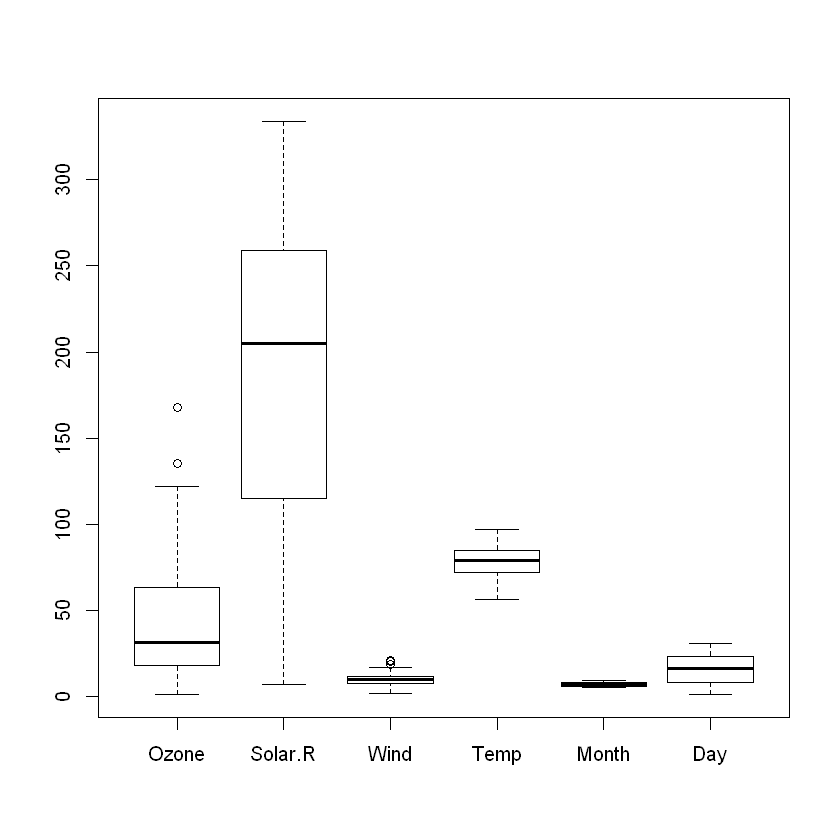

In [82]:
#이상값으로 판단하기에 명확하지 않은 값이 존재할 수 있다.
boxplot(airquality) #오존에 이상치가 있는 것을 확인 할 수 있다

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00   18.00   31.50   42.13   63.25  168.00      37 

[,1]
[1,]   1.0
[2,]  18.0
[3,]  31.5
[4,]  63.5
[5,] 122.0
attr(,"class")
        1 
"integer"

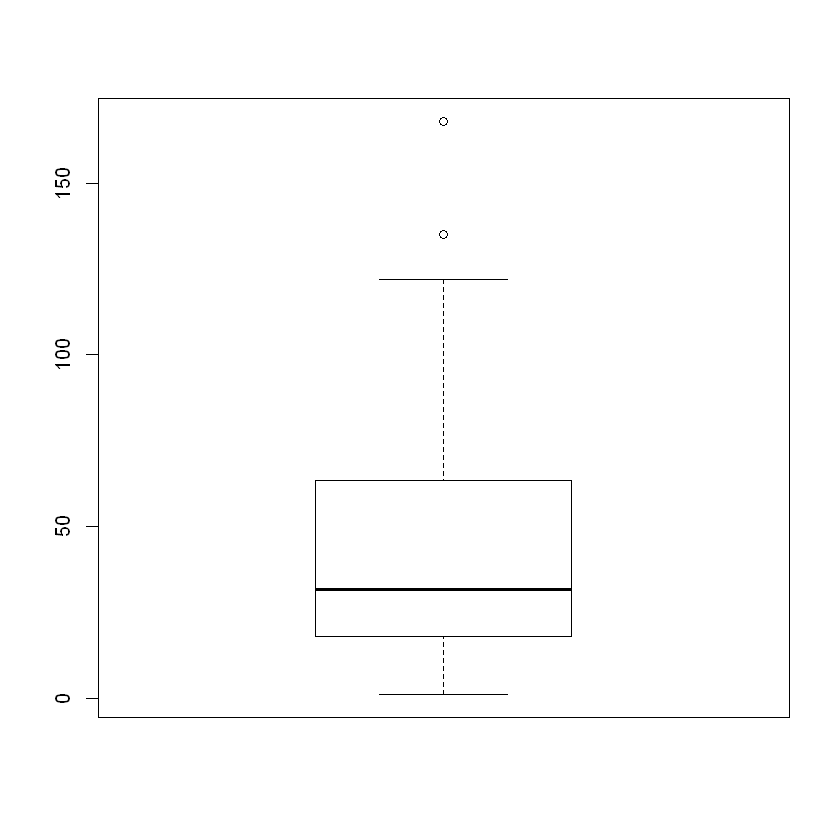

In [88]:
#Ozone에 있는 이상값을 제거하는 작업
summary(airquality$Ozone) 

#정상범위를 벗어났다고 판정하는 값
#최소값 : 중앙값 - 1.5*IRQ(3Q-1Q)
#최대값 : 중앙값 - 1.5*IRQ(3Q-1Q)


#계산을 하는 것 보다..
boxplot(airquality$Ozone)$stats
#1과 122가 결측값으로 측정 됨


In [98]:
#복사본
air = airquality

#Ozone의 결측값치 개수 추출
table(is.na(air$Ozone))
mean(air$Ozone, na.rm=T)

#x통계량값을 이용해서 이상값을 찾아 결측처리하는 작업
air$Ozone = ifelse(air$Ozone<1 |air$Ozone>122 , NA , air$Ozone)
table(is.na(air$Ozone)) #결측값이 2개 늘어남
mean(air$Ozone, na.rm=T)




FALSE  TRUE 
  116    37 

[1] 42.12931


FALSE  TRUE 
  114    39 

[1] 40.21053

weight   Time  Chick   Diet 
     0      0      0      0

35
63
103
164
309


[1] 9

[1] 118.4271

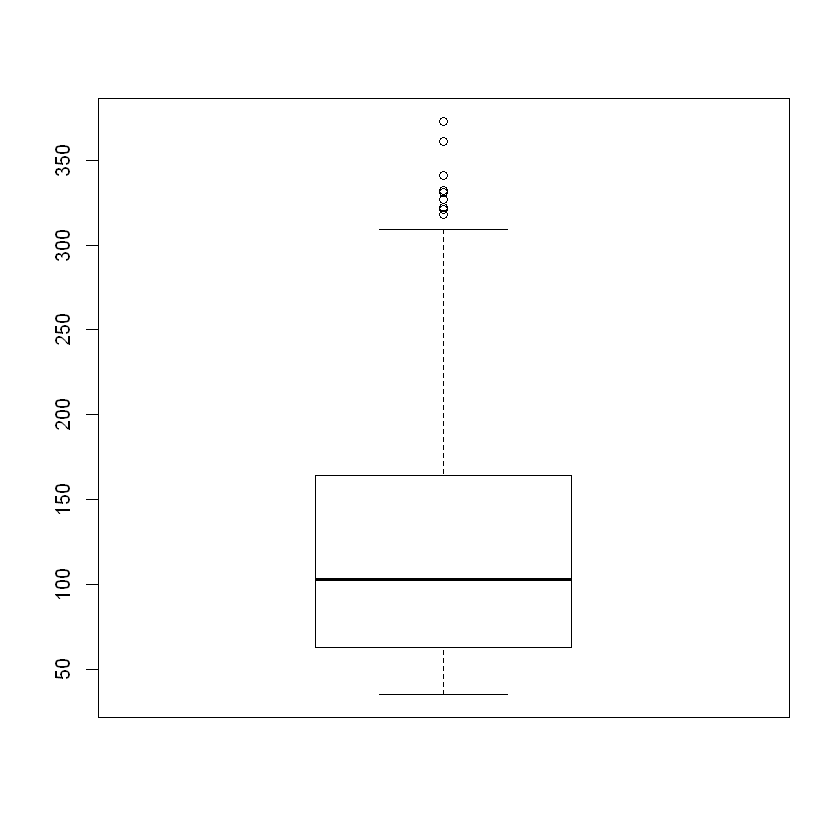

In [115]:
#ChickWeight - 몸무게 이상치 제거후 평균 구하기

C = ChickWeight
colSums(is.na(ChickWeight)) #결측치 없음
boxplot(ChickWeight$weight)$stats #35 이하, 309 이상 결측치
C$weight = ifelse(C$weight<35 | C$weight>309,NA,C$weight) #이상치 제거후 저장
sum(is.na(C$weight)) #이상치가 결측치로 처리됬는지 확인
mean(C$weight, na.rm = T) #결측치 제외 후 평균 구하기

speed  dist 
    0     0

4
12
15
19
25


[1] 0

[1] 15.4

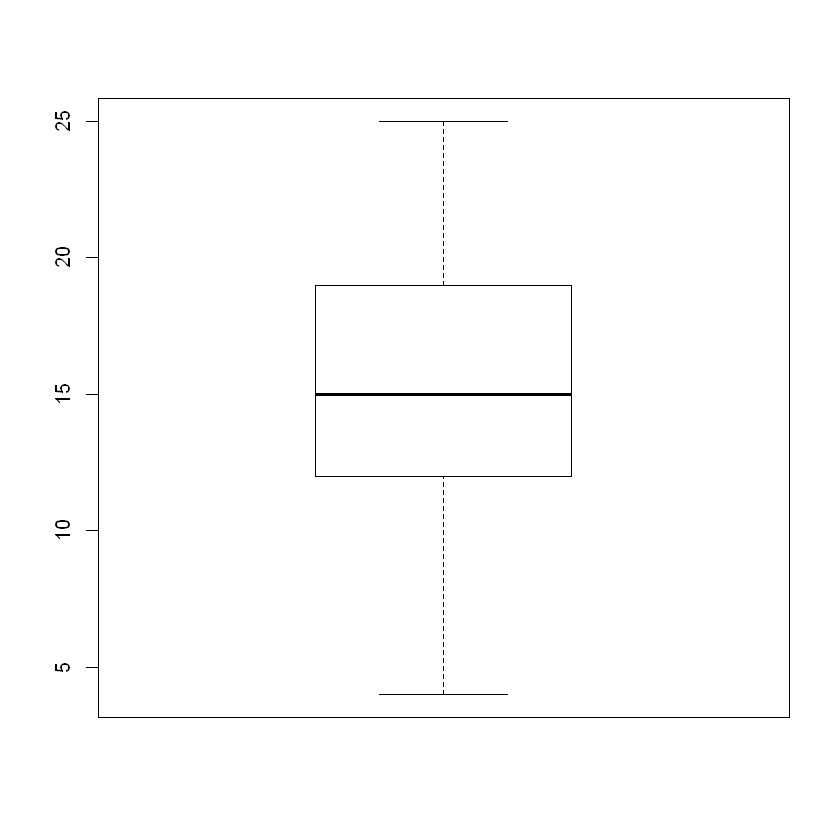

In [127]:
#ChickWeight - 몸무게 이상치 제거후 평균 구하기

C1 = cars
colSums(is.na(C1)) #결측치 없음
boxplot(C1$speed)$stats #4이하 25이상 결측치
C1$speed = ifelse(C1$speed<4 | C1$speed>25,NA,C1$speed)
sum(is.na(C1$speed)) #이상치가 결측치로 처리됬는지 확인
mean(C1$speed, na.rm = T) #결측치 제외 후 평균 구하기